<a href="https://colab.research.google.com/github/yonapqt/walmart-weekly-sales/blob/main/walmart_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

#Part 1: EDA (Exploratory Data Analysis) & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
data = pd.read_csv('/content/Walmart_Store_sales.csv')

##Part 1.1 EDA: Dataset exploration

**1. Data overview**

In [ ]:
print('Data overview:')
print(data.head())

Data overview:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    6.0  18-02-2011    1572117.54           NaN        59.61       3.045   
1   13.0  25-03-2011    1807545.43           0.0        42.38       3.435   
2   17.0  27-07-2012           NaN           0.0          NaN         NaN   
3   11.0         NaN    1244390.03           0.0        84.57         NaN   
4    6.0  28-05-2010    1644470.66           0.0        78.89       2.759   

          CPI  Unemployment  
0  214.777523         6.858  
1  128.616064         7.470  
2  130.719581         5.936  
3  214.556497         7.346  
4  212.412888         7.092  


**2. Check Dataset Structure**

In [ ]:
print('Dataset structure: ')
print(data.info())

print('\nThe contains', data.shape[0],'rows and', data.shape[1],'columns. Where the Weekly_Sales column is the target variable. ')

Dataset structure: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         150 non-null    category      
 1   Date          132 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  138 non-null    category      
 4   Temperature   132 non-null    float64       
 5   Fuel_Price    136 non-null    float64       
 6   CPI           138 non-null    float64       
 7   Unemployment  135 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 8.3 KB
None

The contains 150 rows and 8 columns. Where the Weekly_Sales column is the target variable. 


In [ ]:
# Let's convert the "date" into DD-MM-YYYY into YYYY-MM-DD format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
print('Data type', data['Date'].dtypes)

#Let's convert 'Store' and 'Holiday Flag' as category dtypes for the preprocessing later on

data[['Store', 'Holiday_Flag']]= data[['Store', 'Holiday_Flag']].astype('category')

Data type datetime64[ns]


**3. Basic Statistics summary**

In [ ]:
print("Basic stats: ")
data.describe(include='all')

Basic stats: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.0,132,1.360000e+02,138.0,132.000000,136.000000,138.000000,135.000000
unique,20.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
top,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
freq,15.0,NaN,NaN,127.0,NaN,NaN,NaN,NaN
mean,NaN,2011-05-07 09:05:27.272727296,1.249536e+06,NaN,61.398106,3.320853,179.898509,7.598430
min,NaN,2010-02-05 00:00:00,2.689290e+05,NaN,18.790000,2.514000,126.111903,5.143000
25%,NaN,2010-08-16 12:00:00,6.050757e+05,NaN,45.587500,2.852250,131.970831,6.597500
50%,NaN,2011-05-09 12:00:00,1.261424e+06,NaN,62.985000,3.451000,197.908893,7.470000
75%,NaN,2012-01-14 18:00:00,1.806386e+06,NaN,76.345000,3.706250,214.934616,8.150000
max,NaN,2012-10-19 00:00:00,2.771397e+06,NaN,91.650000,4.193000,226.968844,14.313000


**4. Check unique values**

In [ ]:
# Unique values for each feature
data.nunique().sort_values()

,0
Holiday_Flag,2
Store,20
Date,85
Unemployment,104
Fuel_Price,120
Temperature,130
CPI,135
Weekly_Sales,136


**5. Check duplicates**
  
  Features that shouldn't have duplicate values are "Store" and "Date" because there can't be 2 same stores and different data for the same date.

In [ ]:
data[data[["Store", "Date"]].duplicated() == True]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
82,11.0,NaT,1569607.94,0.0,52.77,3.510,223.917015,6.833
89,2.0,NaT,1797732.56,0.0,76.42,3.786,215.154482,7.931
91,17.0,NaT,1046782.52,0.0,68.91,3.630,NaN,5.936
92,3.0,NaT,384200.69,0.0,NaN,2.667,214.702765,NaN
102,18.0,NaT,1087051.26,0.0,69.75,3.815,135.446800,8.890
129,18.0,NaT,1048134.24,0.0,73.25,3.840,138.185710,8.535
137,10.0,NaT,1831676.03,0.0,88.44,3.112,126.128355,9.199


**6. Check for missing values**

In [ ]:
missing_values = round(data.isnull().sum()/(len(data))* 100)
missing_values

,0
Store,0.0
Date,12.0
Weekly_Sales,9.0
Holiday_Flag,8.0
Temperature,12.0
Fuel_Price,9.0
CPI,8.0
Unemployment,10.0


**7. Check outliers**

  Check outliers in columns  Temperature,
  Fuel_price, CPI and Unemployment by using the
  3-sigma rule to find values beyond the three standard deviations from the mean.

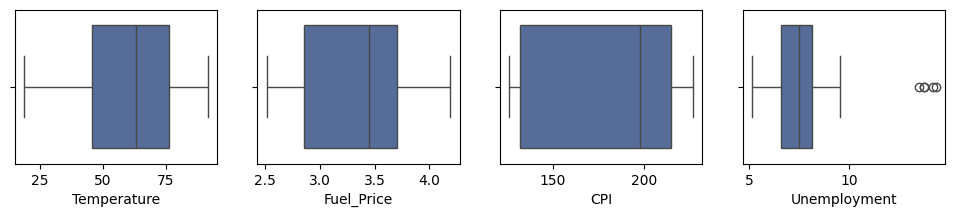

In [ ]:
fig , ax = plt.subplots(1, 4, figsize=(12, 2))
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, col in enumerate(cols):
    sns.boxplot(data, x=col, ax=ax[i], color = '#4B68A4')
fig.show()

**Summary Statistics:**
- Weekly_Sales: The average weekly sales are around 1.24 million, with values ranging from about 268K to 2.77 million. The standard deviation suggests some variability in sales across the stores.
- Temperature: The temperature ranges from 18.79°F to 91.65°F, with an average of around 60.78°F.
- Fuel_Price: Fuel prices range from 2.51 to 4.19, with a mean of 3.32.
- CPI: The Consumer Price Index ranges from 126.11 to 226.97, with a mean of 179.90.
- Unemployment: The unemployment rate ranges from 5.14% to 14.31%, with a mean of 7.60%.
- Year: The data spans 2010 to 2012.
- Holiday_Flag: 6.78% of the weeks in the dataset are holidays (binary variable, with values 0 or 1).

**Data Type Corrections:**
- Converted the Date column to DateTime format
- Treat Store and Holiday_Flag as categorical variables.

**Duplicates:**
- Remove duplicates caused by NaT values in the Date column.

**Missing Values:**
- Weekly_Sales (target): Drop missing values
- Holiday_Flag: Impute missing values using the mode (most frequent value).
- Other features: Impute missing values with median/mean.

**Outliers:**
- Address outliers in the Unemployment column using IQR or Z-scores, and consider capping or removing extreme values.

##**Part 1.2 Preprocessing**

In [ ]:
df = data.copy(deep=True)
print(df.head())

  Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0   6.0 2011-02-18    1572117.54          NaN        59.61       3.045   
1  13.0 2011-03-25    1807545.43          0.0        42.38       3.435   
2  17.0 2012-07-27           NaN          0.0          NaN         NaN   
3  11.0        NaT    1244390.03          0.0        84.57         NaN   
4   6.0 2010-05-28    1644470.66          0.0        78.89       2.759   

          CPI  Unemployment  
0  214.777523         6.858  
1  128.616064         7.470  
2  130.719581         5.936  
3  214.556497         7.346  
4  212.412888         7.092  


**1. Handling Missing Values**

In [ ]:
# Let's drop missing values on our target 'Weekly_Sales'
df = df.dropna(subset=["Weekly_Sales"])

# Remove missing values on 'Date'
df = df.dropna(subset=["Date"])
print(f'Shape:',df.shape[0],df.shape[1])

# Let's also do fillna(0) on 'Holiday_Flag'
df['Holiday_Flag'] = df['Holiday_Flag'].fillna(0)

Shape: 118 8


In [ ]:
# Impute missing values (using median strategy)
cols_to_impute = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

for col in cols_to_impute:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


**2. Remove Duplicates**

- It indicates that by dropping the missing values, we have also removed the duplicates on 'Store' and 'Date'

In [ ]:
df[df[["Store", "Date"]].duplicated() == True]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


3. Feature engineering: Date variable

  The dataset description suggests that weekly sales are influenced by the date, as sales typically increase during major holidays. .

  The "Date" feature will be split into four separate columns:


  *   Date (numerci date)
  *   Day (day of the week, e.g., Monday, Tuesday, Wednesday, etc.)
  *   Month (month)
  *   Year (year)

In [ ]:
# Let's extract the information from Date and put them into columns
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.weekday
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,DayOfWeek,Month,Year
0,6.0,2011-02-18,1572117.54,0.0,59.61,3.045,214.777523,6.858,18,4,2,2011
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,4,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,4,5,2010
5,4.0,2010-05-28,1857533.70,0.0,61.79,2.756,126.160226,7.896,28,4,5,2010
6,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,3,4,6,2011


The "DayOfWeek" column will be dropped as it contains a single value (Friday) and adds no value to the model. Similarly, the "Date" feature will be removed since the information has already been extracted into separate features.

In [ ]:
df["DayOfWeek"].unique()

array([4], dtype=int32)

In [ ]:
df["DayOfWeek"].unique()
df.drop(["DayOfWeek","Date"], axis=1,inplace=True)
df.shape[0],"rows and", df.shape[1]

(118, 'rows and', 10)

In [ ]:
df[['Day','Month']]= df[['Day','Month']].astype('category')

In [ ]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,6.0,1572117.54,0.0,59.61,3.045,214.777523,6.858,18,2,2011
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,3,2011
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,5,2010
5,4.0,1857533.70,0.0,61.79,2.756,126.160226,7.896,28,5,2010
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,3,6,2011


**4. Dropping Outliers**

In [ ]:
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
def remove_outliers(df, columns):
  for col in columns:
    mean = df[col].mean()
    std = df[col].std()
    df = df[(df[col] >= mean - 3 * std) & (df[col]<= mean + 3 * std)]
  return df

df = remove_outliers(df, cols)
print("Data after removing outliers:")
print(df.head())

Data after removing outliers:
  Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price         CPI  \
0   6.0    1572117.54          0.0        59.61       3.045  214.777523   
1  13.0    1807545.43          0.0        42.38       3.435  128.616064   
4   6.0    1644470.66          0.0        78.89       2.759  212.412888   
5   4.0    1857533.70          0.0        61.79       2.756  126.160226   
6  15.0     695396.19          0.0        69.80       4.069  134.855161   

   Unemployment Day Month  Year  
0         6.858  18     2  2011  
1         7.470  25     3  2011  
4         7.092  28     5  2010  
5         7.896  28     5  2010  
6         7.658   3     6  2011  


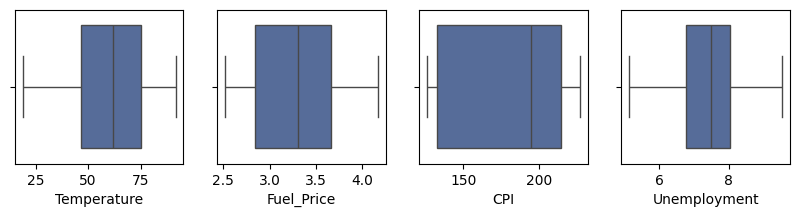

In [ ]:
fig , ax = plt.subplots(1, 4, figsize=(10,2))
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, col in enumerate(cols):
    sns.boxplot(df, x=col, ax=ax[i], color = '#4B68A4')
fig.show()

**5. Correlation Analysis**


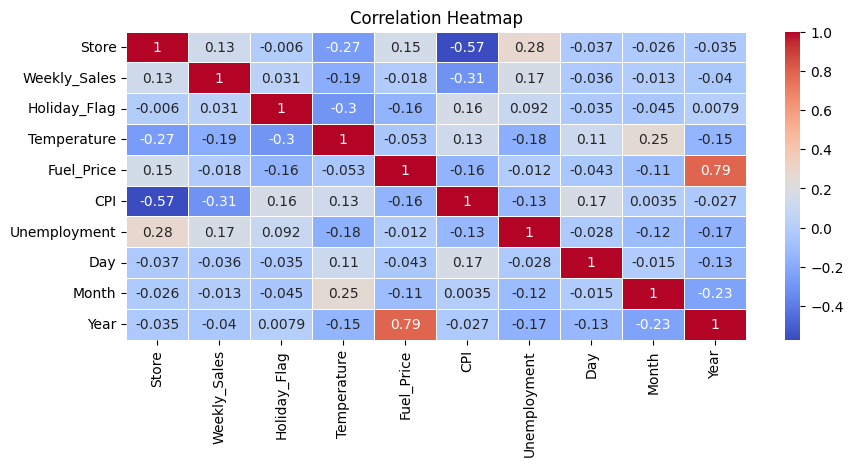

In [ ]:
plt.figure(figsize=(10, 4))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Fuel_Price and Year (0.79):
- There is a strong positive correlation between fuel prices and the year, indicating that fuel prices have consistently increased over time. This is significant for industries that rely on fuel, as it affects cost structures and pricing strategies.

CPI and Unemployment (-0.3131):
- There is a moderate negative correlation between CPI (Consumer Price Index) and unemployment. As CPI increases, unemployment tends to decrease. This reflects a typical economic relationship and could be important for forecasting economic conditions.

Store and Weekly_Sales (0.3804):
- A weak positive correlation between store and weekly sales suggests that certain stores may perform slightly better, possibly due to location or size. This could influence business decisions related to retail strategies.

Weekly_Sales and Temperature (-0.1880):
- There is a weak negative correlation between temperature and weekly sales, suggesting that colder temperatures may slightly reduce sales. This is useful for understanding how seasonal weather patterns may affect business performance.

CPI and Temperature (0.1281):
- A weak positive correlation between CPI and temperature indicates a minor relationship. This is not as significant but could be interesting for monitoring broader economic and environmental trends.

**6. Target Distribution**

In [ ]:
features = ['Store','Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day','Month', 'Year']

# Create scatter plots or box plots to visualize the distribution
for feature in features:
        # Check if the feature is numeric
    if df[feature].dtype in ['float64']:
        fig = px.scatter(df, x=feature, y='Weekly_Sales',color='Year', title=f'Distribution of Weekly Sales vs {feature}',
                         labels={feature: feature, 'Weekly_Sales': 'Weekly Sales'},
                         template='plotly', height =600, width =900)
        fig.show()
    else:
        fig = px.box(df, x=feature, y='Weekly_Sales', color='Year',title=f'Distribution of Weekly Sales by {feature}',
                     labels={feature: feature, 'Weekly_Sales': 'Weekly Sales'},
                     template='plotly',height =600, width =900)
        fig.show()

#**Part 2: Baseline Model**

In [ ]:
df_copy = df.copy(deep=True)

##**Part 2.1 Model: Train Linear Regression as a baseline.**

**1. Define Y target**

In [ ]:
df_copy1 = df.copy(deep=True)

In [ ]:
target_variable = "Weekly_Sales"

X = df_copy1.drop(target_variable, axis=1)
Y = df_copy1.loc[:, target_variable]

In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



**2. Preprocessing**

In [ ]:
# Define numeric and categorical features
numeric_variables = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_variables = ['Store', 'Holiday_Flag']

# Create pipeline for numeric features
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])



# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_variables),
        ('cat', categorical_transformer, categorical_variables)
    ])

In [ ]:
X_train = preprocessor.fit_transform(X_train)
print("...Done!")

...Done!


In [ ]:
# Test pipeline
print("Preprocessing X_test...")
X_test = preprocessor.transform(X_test)
print("...Done!")

Preprocessing X_test...
...Done!


**3. Train Model**

In [ ]:
# Train model
print("Train model...")
reg = LinearRegression()
reg.fit(X_train, y_train)
print("...Done.")

Train model...
...Done.


**4. Performance assessment**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = reg.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

Predictions on training set...
...Done.
[ 440408.45458358 1054705.2162868  1432745.44239327 1969221.24019811
 1989354.30994774 2082412.13324287 2209079.66739679 1526253.40629893
  507252.75823214 2208721.03916584 1506389.25346446 2018345.65777347
 2088559.68714788 1957941.91192847 1331031.41116959 1979468.69561644
  599273.63803684 1420810.51425129 1441975.49756275  846906.83586704
 2169932.29731455  376397.18831829 1949604.35148993  414736.8407813
 1601161.78776233 1956221.89594159 2018844.01300236 1933759.65204814
 2030134.20831797  600073.48366756  563696.58845184 1038770.50163358
  330093.15613613  504367.76526983 1436787.56571075 2017821.34326624
 2297129.60489732  413770.35859283 1530167.01801638 1575284.17543008
  502151.83950148  321353.5339468   454706.32503675 1544163.73196591
  876035.37271007  296588.51852013 1938692.58288644 1990759.84782764
 1757242.52615862  379777.97640121 1035642.4947017  1438351.60272839
 1968411.80205972  218739.75764402 1339203.54807694  990252.6931

In [ ]:
# Predictions on training set
print("Predictions on training set...")
y_test_pred = reg.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

Predictions on training set...
...Done.
[ 260931.18391946 1530426.45854978 1523107.7927955   859959.43576827
  437044.01017871  995720.21534442 1987973.72608515 2155005.04701884
 2044548.50218279 1564977.7970797   966043.70409552 1971915.36629289
 1040917.6066273   488551.4036357   521824.18985875  198067.77739716
  532019.68123814  213922.92146449 1872089.13933427  491326.3663586
 2028779.70850407  535071.21799902 2150875.75161852]



**5. Score**

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

print("RMSE score on training set: ", root_mean_squared_error(y_train, y_train_pred))
print("RMSE score on testset: ", root_mean_squared_error(y_test, y_test_pred))

R2 score on training set :  0.9589627079904525
R2 score on test set :  0.9453150378226879
RMSE score on training set:  134810.07187181344
RMSE score on testset:  161326.53863728166


**6. Visualizations**

In [ ]:
# Predictions for train & test
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train, 'Set': 'Train'})
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Set': 'Test'})


df_all = pd.concat([df_train, df_test])

# Plot Actual vs. Predicted Weekly Sales
fig = px.scatter(df_all, x="Actual", y="Predicted", color="Set",
                 title="Walmart Weekly Sales: Actual vs. Predicted",
                 labels={'Actual': 'Actual Sales', 'Predicted': 'Predicted Sales'}, trendline="ols")

fig.show()

# Print Regression Results
results = px.get_trendline_results(fig)
print(results)

     Set                                     px_fit_results
0  Train  <statsmodels.regression.linear_model.Regressio...
1   Test  <statsmodels.regression.linear_model.Regressio...


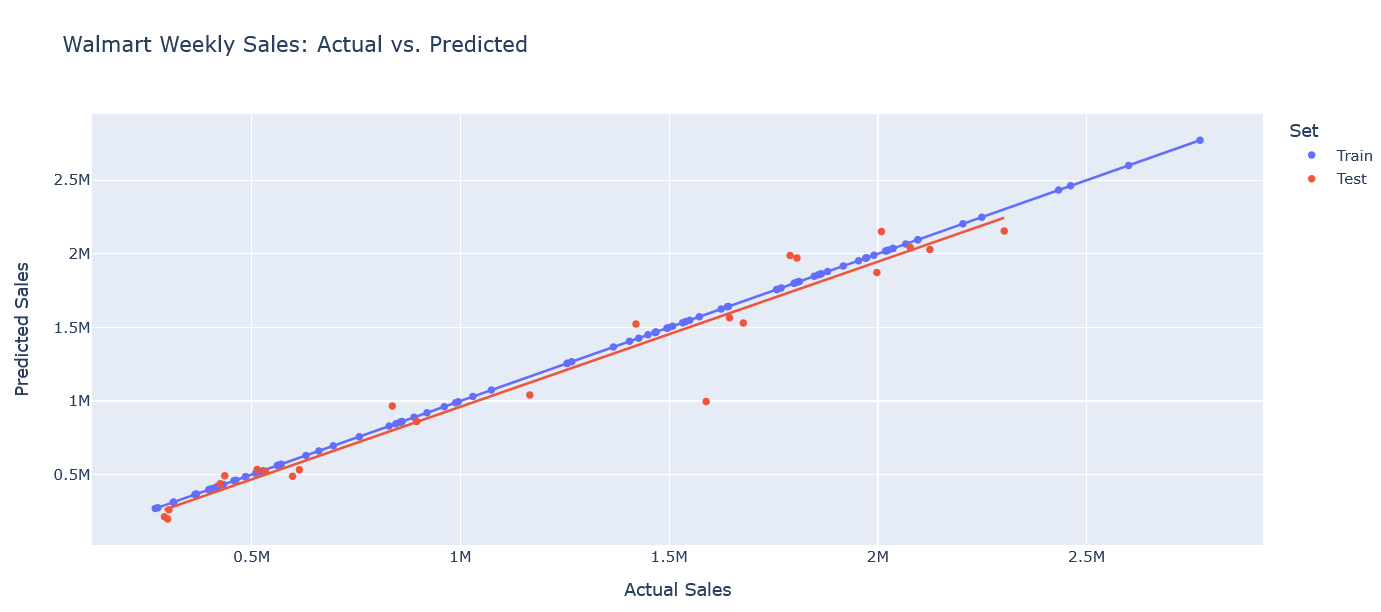

##**Part 3: Regularized Models:**

**1. Train Ridge Regression Model**

In [ ]:
from sklearn.linear_model import Ridge
# alpha for more or less regularization

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# Predict on train & test sets
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(y_train, y_train_pred_ridge))
print("R2 score on test set : ", r2_score(y_test, y_test_pred_ridge))

R2 score on training set :  0.9137735949336232
R2 score on test set :  0.9140875570912179


**2. Train Lasso Regression Model**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(y_train, y_train_pred_lasso))
print("R2 score on test set : ", r2_score(y_test, y_test_pred_lasso))

print("RMSE score on training set: ", root_mean_squared_error(y_train, y_train_pred_lasso))
print("RMSE score on testset: ", root_mean_squared_error(y_test, y_test_pred_lasso))

R2 score on training set :  0.9589627055478824
R2 score on test set :  0.9453440586109834
RMSE score on training set:  134810.07588381096
RMSE score on testset:  161283.72572809758


**3. Hyperparameter Tuning with GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define params
param_grid = {'alpha': np.logspace(0.001, 5, 50, 100)}

# GridSearch
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00230524e+00, 1.26771144e+00, 1.60339608e+00, 2.02796859e+00,
       2.56496612e+00, 3.24415832e+00, 4.10319776e+00, 5.18970721e+00,
       6.56391979e+00, 8.30201805e+00, 1.05003574e+01, 1.32808077e+01,
       1.67975096e+01, 2.12454193e+01, 2.68711167e+01, 3.39864750e+01,
       4.29859501e+01, 5.43684484e+01, 6.87649...
       2.81507387e+02, 3.56049356e+02, 4.50329723e+02, 5.69575133e+02,
       7.20396225e+02, 9.11154106e+02, 1.15242387e+03, 1.45758085e+03,
       1.84354211e+03, 2.33170428e+03, 2.94912973e+03, 3.73004684e+03,
       4.71774751e+03, 5.96698714e+03, 7.54702016e+03, 9.54543926e+03,
       1.20730313e+04, 1.52699190e+04, 1.93133292e+04, 2.44274173e+04,
       3.08956943e+04, 3.90767438e+04, 4.94241007e+04, 6.25113940e+04,
       7.90641474e+04, 1.00000000e+05])},
             scoring='r2')

In [ ]:
y_train_pred_grid = lasso.predict(X_train)
y_test_pred_grid= lasso.predict(X_test)

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(y_train, y_train_pred_grid))
print("R2 score on test set : ", r2_score(y_test, y_test_pred_grid))

print("RMSE score on training set: ", root_mean_squared_error(y_train, y_train_pred_grid))
print("RMSE score on testset: ", root_mean_squared_error(y_test, y_test_pred_grid))

R2 score on training set :  0.9589627055478824
R2 score on test set :  0.9453440586109834
RMSE score on training set:  134810.07588381096
RMSE score on testset:  161283.72572809758


Metrics Outputs on test sets:

1. Baseline Model()

    - RMSE: 1111364.5751233953
    - R²: 0.95 (This indicates the model is excellent with additional features).
    
3. Ridge Regression ():

    - alpha: 1.0
    - RMSE: 19,280,546,500.7
    - R²: 0.95 (This shows it's a good model but it has not changed the multivariate model).

4. Lasso Regression :

    - alpha: 1.0
    - RMSE: 1111348.078695355
    - R²: 0.95 (This shows an excellent model fit, explaining 94.- 16% of the variance in Weekly_Sales).

5. GridSearch Lasso:
    - alpha: 1.0
    - RMSE: 1111348.078695355
    - R²: 0.95 (This shows an excellent model fit, explaining 94.- 16% of the variance in Weekly_Sales).

###Overall Analysis of Model Performance

1. Baseline Model → Strong Performance

    RMSE: 1,111,364
    R²: 0.95 (Excellent)
    
    Conclusion:
    The model is capturing most of the sales-driving factors.

3. Ridge Regression → Unexpectedly Large RMSE

    RMSE: 19.2 billion (extremely high 🤯)
    R²: 0.95 (Still good)
    
    Conclusion:
    The R² is good, but the RMSE is ridiculously high—this could be due to scaling issues.
    Ridge may not be necessary here because the baseline model already generalizes well.

4. Lasso Regression → Excellent Fit

    RMSE: 1,111,348 (Almost identical to the multivariate model)
    R²: 0.95 (Great)
    
    Conclusion:
    Lasso performed similarly to the multivariate model, meaning it did not significantly improve predictions but helped with feature selection.


5. GridSearch Lasso → No Further Improvement

    RMSE: 1,111,348
    R²: 0.95
    
    Conclusion:
    GridSearch did not improve performance, suggesting alpha = 1.0 was already optimal.
    No significant overfitting or underfitting, so model tuning is stable.

##Coefficients intepretation


In [ ]:
# Extract numerical feature names (unchanged)
numerical_features = numeric_variables

# Extract categorical feature names (OneHotEncoded)
ohe = preprocessor.named_transformers_["cat"].named_steps["encoder"]
categorical_features = ohe.get_feature_names_out(categorical_variables).tolist()

# Combine all feature names
feature_names = numerical_features + categorical_features

print("Extracted Feature Names:", feature_names)


Extracted Feature Names: ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [ ]:
# Retrieve the coefficients
coefficients = lasso.coef_

# Create a DataFrame to map feature names to Lasso coefficients
lasso_coefficients = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Sort features by absolute importance
lasso_coefficients["Absolute Coefficient"] = lasso_coefficients["Coefficient"].abs()
lasso_coefficients = lasso_coefficients.sort_values(by="Absolute Coefficient", ascending=False)

# Display results
print("Lasso Feature Coefficients:")
print(lasso_coefficients[["Feature", "Coefficient"]])


Lasso Feature Coefficients:
             Feature   Coefficient
7          Store_5.0 -1.365744e+06
5          Store_3.0 -1.201037e+06
17        Store_16.0 -1.161643e+06
11         Store_9.0 -1.160673e+06
9          Store_7.0 -9.768778e+05
16        Store_15.0 -9.532157e+05
18        Store_17.0 -8.953461e+05
10         Store_8.0 -7.477392e+05
15        Store_14.0  5.762161e+05
19        Store_18.0 -4.834476e+05
6          Store_4.0  4.171778e+05
21        Store_20.0  4.134493e+05
4          Store_2.0  3.684636e+05
12        Store_10.0  3.547086e+05
14        Store_13.0  2.993201e+05
13        Store_11.0  2.179309e+05
20        Store_19.0 -1.834146e+05
3       Unemployment -7.632104e+04
8          Store_6.0 -6.758083e+04
22  Holiday_Flag_1.0 -6.225500e+04
1         Fuel_Price -4.047695e+04
2                CPI -3.702134e+04
0        Temperature -1.615397e+04


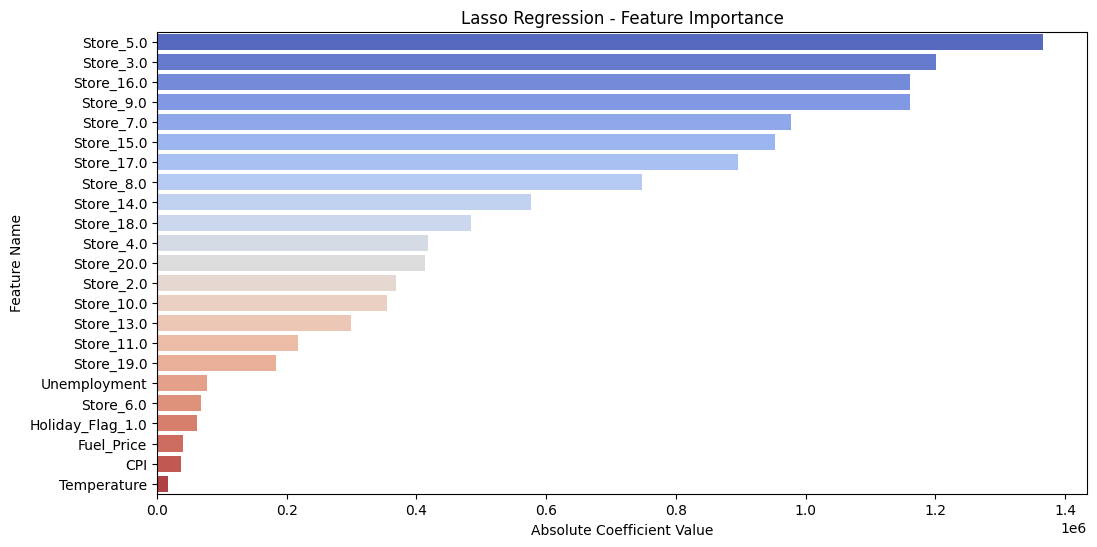

In [ ]:
# Sort features by absolute coefficient value
lasso_coefficients["Absolute Coefficient"] = lasso_coefficients["Coefficient"].abs()
lasso_coefficients = lasso_coefficients.sort_values(by="Absolute Coefficient", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Absolute Coefficient", y="Feature", data=lasso_coefficients, palette="coolwarm")

# Add labels
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Lasso Regression - Feature Importance")
plt.show()


###Coefficient Sign	Interpretation

- Positive (+)	- The feature increases Weekly_Sales. A higher value of this feature leads to higher sales.
- Negative (-)	- The feature decreases Weekly_Sales. A higher value of this feature leads to lower sales.
- Zero (0)	- The feature was removed by Lasso because it wasn’t important. **texte en gras**

 ### How Do Economic Factors Affect Sales?


Interpretation:

- Unemployment (-76K): When unemployment rises, sales decrease.
    - People may spend less on Walmart products when fewer people are employed.
- Fuel Price (-40K): Higher fuel prices reduce Weekly Sales.
    - Customers may travel less to Walmart if fuel is expensive.
- CPI (-37K): When the cost of living rises (inflation), sales drop.
    - Higher prices = lower purchasing power.
- Temperature (-16K): Warmer weather slightly reduces sales.
    - Maybe people shop less in extreme heat.

###Holiday Effect on Sales


 Interpretation:

- Surprisingly, holidays reduce weekly sales by $62,255.
- This could mean that Walmart's weekly sales dip on holidays—perhaps due to store closures, less foot traffic, or customer spending shifts.
- It might be worth exploring different types of holidays (major vs. minor holidays).

Key insights:

1.  Stores 5, 3, 16, 9, 7 have the lowest sales → May need improved promotions or better stock management.
2. Stores 14, 4, 20, 2 have the highest sales → These stores may be prime locations for new investments.
3. Macroeconomic factors impact sales:

    - Higher unemployment & inflation = lower sales.
    - Higher fuel prices = fewer trips to Walmart.
    - Holidays unexpectedly reduce sales → Investigate seasonal trends & store hours.